In [ ]:
import sklearn
import cv2
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
imgs_path='imgs/0'

for img_name in os.listdir(imgs_path):
    img=Image.open(os.path.join(imgs_path,img_name)).resize((100,100))
    img=np.array(img)
    #img=cv2.GaussianBlur(img,(5,5),1)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #img=cv2.threshold(img,120,255,cv2.THRESH_BINARY)[1]
    
    plt.imshow(img)
    plt.show()

In [1]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

from PIL import Image

class ShotgunKingDataset(Dataset):
    def __init__(self, root, transform=None):
        super(ShotgunKingDataset, self).__init__()
        self.root = root
        self.imgs_path_list=[]
        self.imgs_lable_list=[]
        for lable in os.listdir(root):
            temp_path=os.path.join(root,lable)
            for img_name in os.listdir(temp_path):
                self.imgs_path_list.append(os.path.join(temp_path,img_name))
                x=int(lable)
                if x<=12:
                    x=x//2
                elif x==13:
                    x=7
                elif x==14:
                    x=8
                self.imgs_lable_list.append(x)
        self.transform = transform
        # 存储图片的路径以及对应标签的元组列表
        

    def __len__(self):
        return len(self.imgs_path_list)

    def __getitem__(self, index):
        # 对图像进行处理再返回
        
        image = Image.open(self.imgs_path_list[index]).convert('RGB')
        lable=self.imgs_lable_list[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, lable
        


In [2]:
mytransform=transforms.Compose([
    #transforms.GaussianBlur(5),
    transforms.Resize((100,100)),
    transforms.ToTensor()
])

mydataset=ShotgunKingDataset('imgs',mytransform)
mydataloader=DataLoader(mydataset,batch_size=1,shuffle=True)

In [3]:
import torch
import torch.nn as nn
import torchvision
resnet=torchvision.models.resnet50()
num_classes = 9
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(resnet.parameters(), lr=0.01)


In [4]:
import numpy as np
num_epochs = 15
for epoch in range(num_epochs):
    sum_loss=[]
    for images, labels in mydataloader:
        images = images.to(device)
        labels = labels.to(device)
        # 前向传播
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss.append(loss.item())
    mean_loss=np.array(sum_loss).mean()
    print(mean_loss)

3.231801984144286
1.6340804951383718
0.5261147662346798
0.10249180409277509
0.07972045048021727
0.005709223676979217
0.0034535141968508325
0.0025114344420476948
0.0019685795954761227
0.001616676326236865
0.0013679812760702113
0.0011827072543498603
0.0010403949355739833
0.000927466384988899
0.0008355602560821729


In [5]:
correct_num=0
for i in range(len(mydataset)):
    output=resnet(mydataset[i][0].unsqueeze(0).to('cuda'))
    if output.argmax()==mydataset[i][1]:
        correct_num+=1
correct_num/len(mydataset)

1.0

In [53]:
torch.save(resnet.state_dict(),'model.pth')

In [42]:
import numpy as np
import win32api
import win32con
import win32gui
import win32ui
from PIL import Image
def window_capture():
    hwnd = 0  # 窗口的编号，0号表示当前活跃窗口
    # 根据窗口句柄获取窗口的设备上下文DC（Divice Context）
    hwndDC = win32gui.GetWindowDC(hwnd)
    # 根据窗口的DC获取mfcDC
    mfcDC = win32ui.CreateDCFromHandle(hwndDC)
    # mfcDC创建可兼容的DC
    saveDC = mfcDC.CreateCompatibleDC()
    # 创建bigmap准备保存图片
    saveBitMap = win32ui.CreateBitmap()
    # 获取监控器信息
    MoniterDev = win32api.EnumDisplayMonitors(None, None)
    w = 1920
    h = 1080
    # print w,h　　　#图片大小
    # 为bitmap开辟空间
    saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)
    # 高度saveDC，将截图保存到saveBitmap中
    saveDC.SelectObject(saveBitMap)
    # 截取从左上角（0，0）长宽为（w，h）的图片
    saveDC.BitBlt((0, 0), (w, h), mfcDC, (0, 0), win32con.SRCCOPY)
    #saveBitMap.SaveBitmapFile(saveDC, filename)
    bmpinfo = saveBitMap.GetInfo()
    bmpstr = saveBitMap.GetBitmapBits(True)
    # 生成图像
    im_PIL = Image.frombuffer(
        'RGB', (bmpinfo['bmWidth'], bmpinfo['bmHeight']), bmpstr, 'raw', 'BGRX', 0, 1)
    return im_PIL
import time
time.sleep(2)
x=150
y=550
board=window_capture().crop((y,x,y+820,x+820))

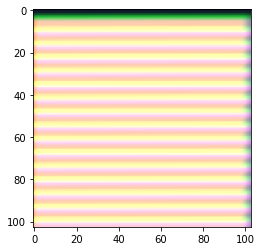

白色


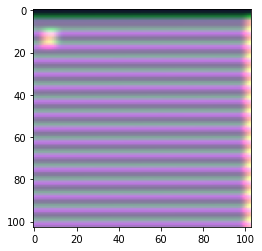

黑色


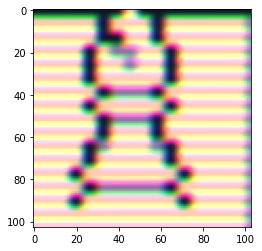

白主教


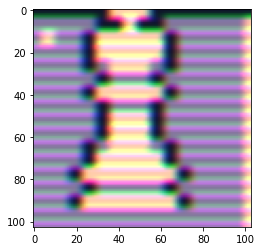

黑城堡


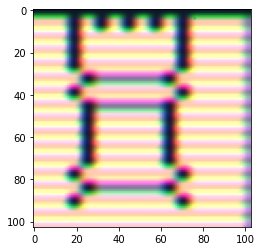

白城堡


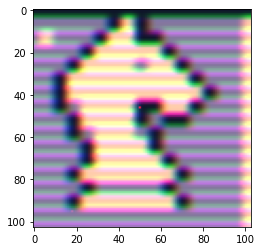

黑马


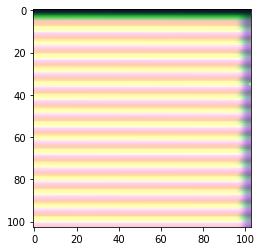

白色


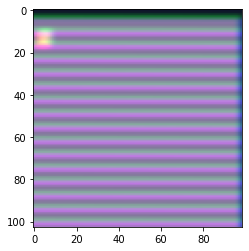

黑色


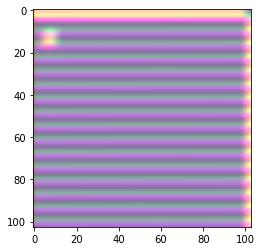

黑色


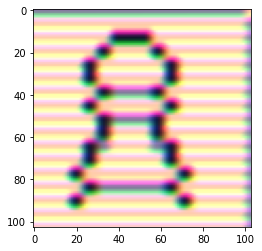

白兵


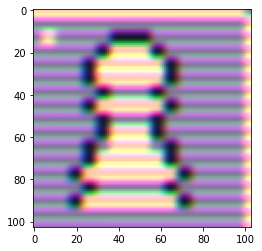

黑兵


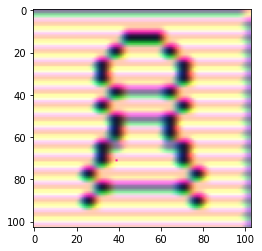

白兵


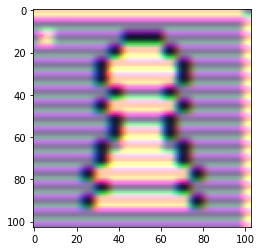

黑兵


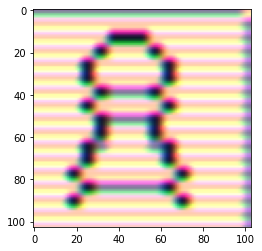

白兵


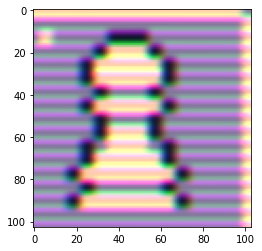

黑兵


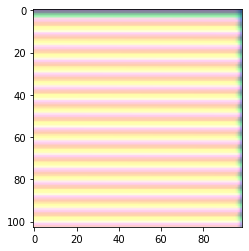

白色


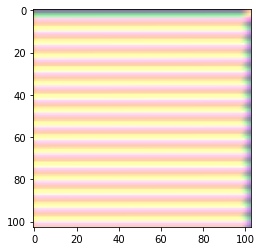

白色


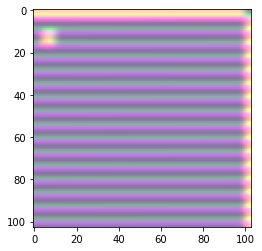

黑色


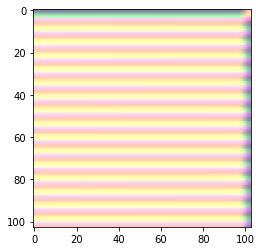

白色


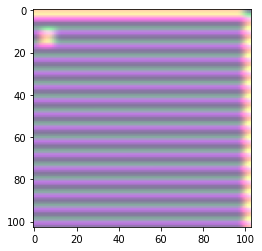

黑色


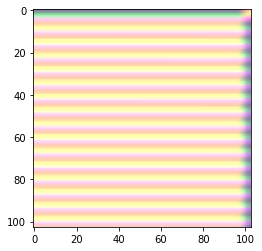

白色


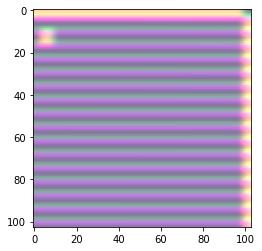

黑色


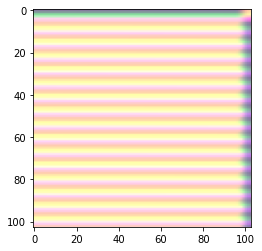

白色


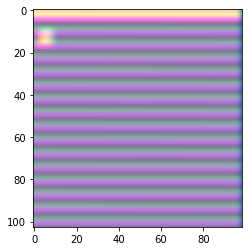

黑色


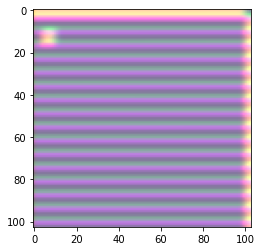

黑色


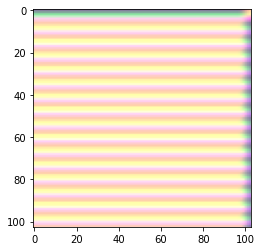

白色


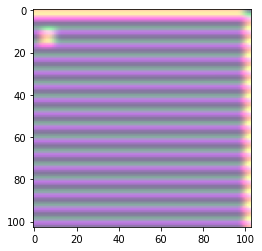

黑色


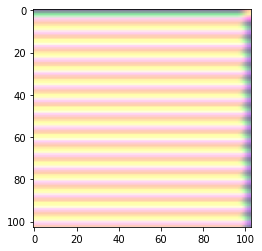

白色


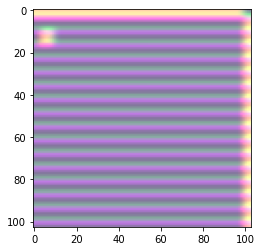

黑色


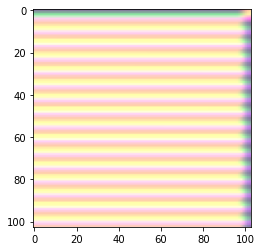

白色


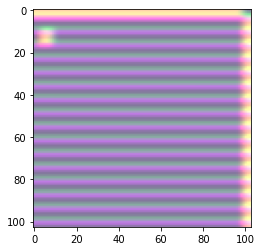

黑色


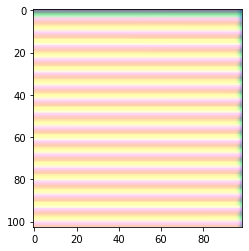

白色


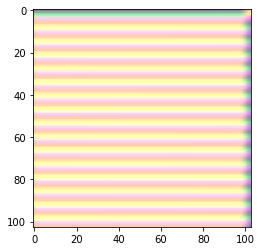

白色


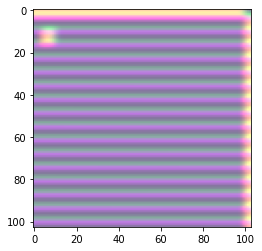

黑色


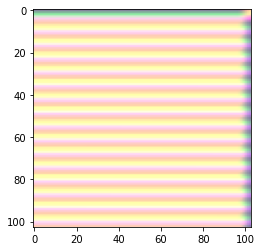

白色


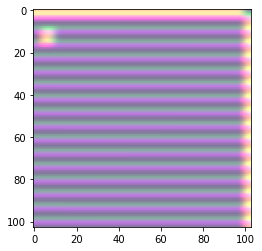

黑色


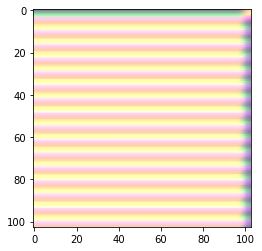

白色


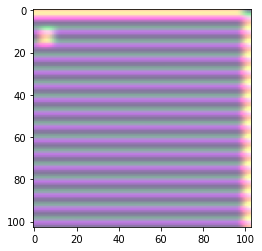

黑色


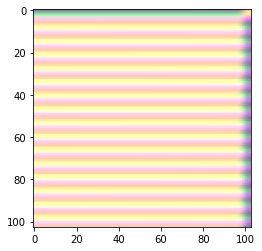

白色


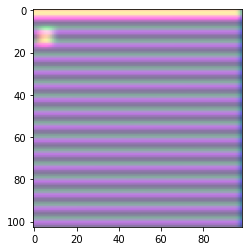

黑色


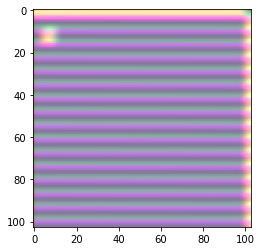

黑色


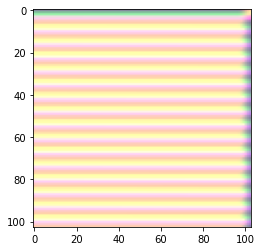

白色


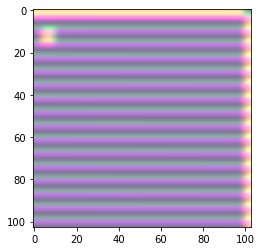

黑色


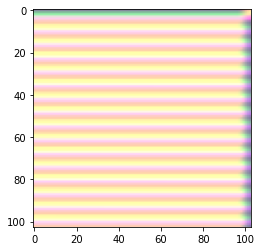

白色


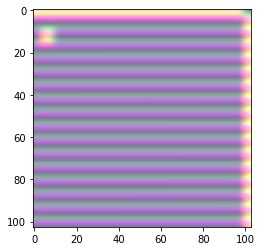

黑色


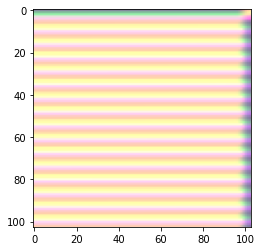

白色


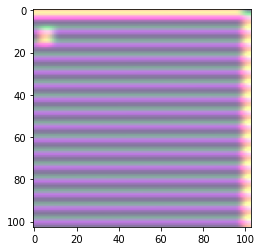

黑色


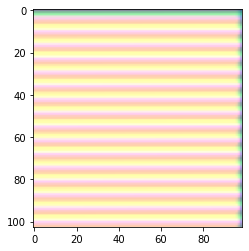

白色


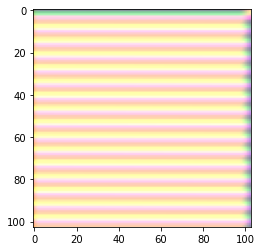

白色


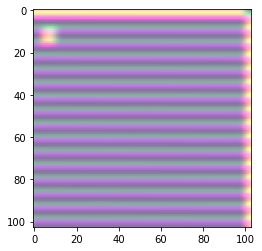

黑色


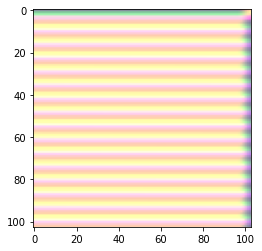

白色


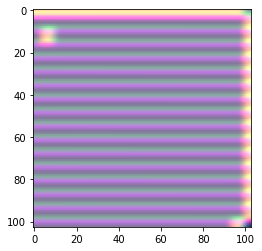

黑色


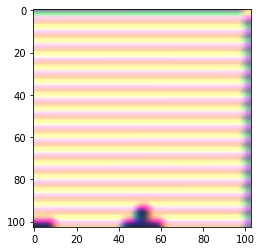

白色


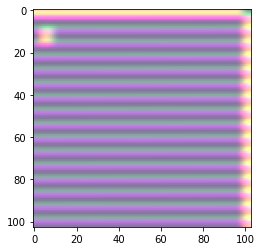

黑色


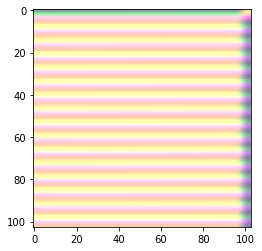

白色


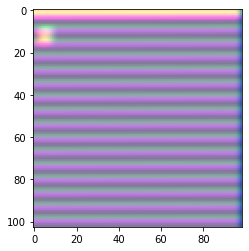

黑色


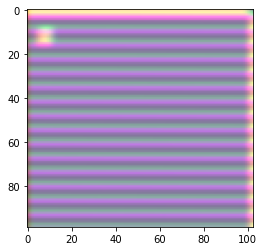

黑色


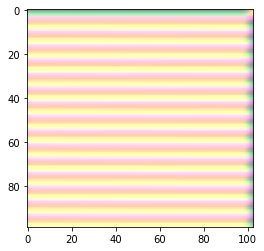

白色


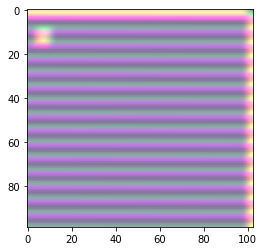

黑色


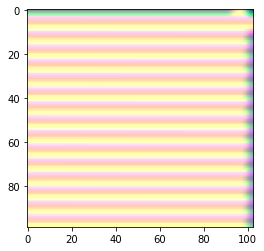

白色


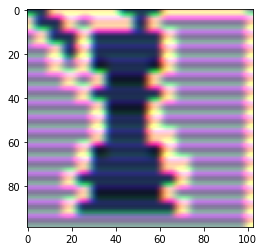

shotgunking


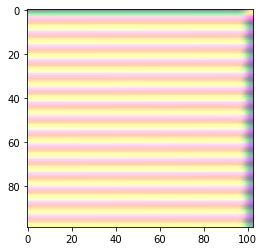

白色


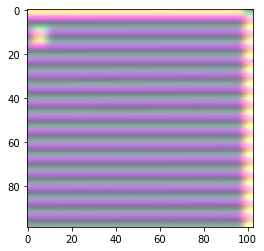

黑色


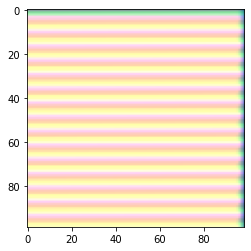

白色


In [33]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
cls_name=['白兵','黑兵','白主教','黑主教','白马','黑马','白城堡','黑城堡','白王','黑王','白王后','黑王后','白色','黑色','shotgunking']
resnet=torchvision.models.resnet50()
num_classes = 15
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
resnet.load_state_dict(torch.load('model.pth'))
resnet.to('cuda')
with torch.no_grad():
    for i in range(8):
        for j in range(8):
            img=board.crop(
                (j*103,i*103,min((j+1)*103,820),min((i+1)*103,820)
                ))
            plt.imshow(img)
            plt.show()
            img_input=mytransform(img).unsqueeze(0).to('cuda')
            output=resnet(img_input)
            print(cls_name[output.argmax()])